## 0.Colab의 파일 시스템

- 기본 디렉터리(폴더)

  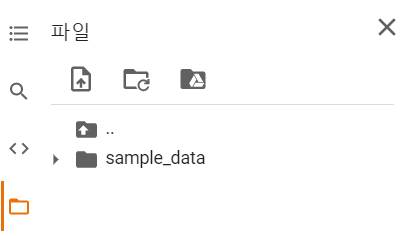
   - ```/content/```
   - 별도 작업이 필요없어 간편함
   - 임시 사용 (접속이 끊어지면 업로드 되었던 파일이 삭제됨)


In [ ]:
/content/sample_data

- 드라이브 마운트
  - 아래의 그림은 마운트 완료된 모습임
    
  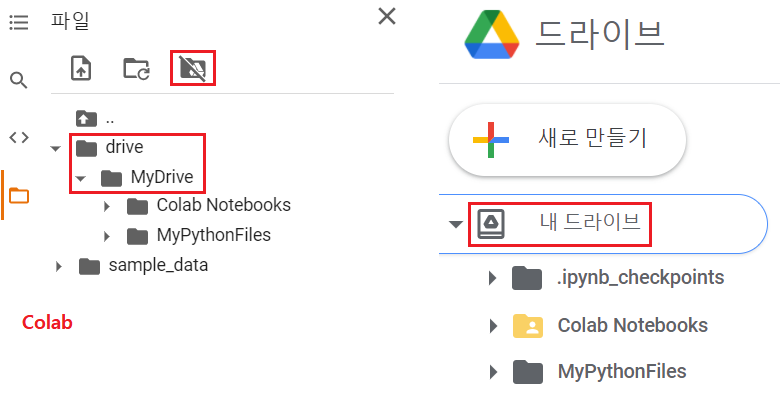   
   - 드라이브 마운트 아이콘을 클릭하여 Google 드라이브를 ```/content/drive```에 마운트함
   - 영구적 저장상태 유지
   - 드라이브 마운트 과정이 필요함




In [ ]:
/content/drive

### 0-01. 실습 환경 준비
1. 경로 변경 및 확인
   - ```/content/drive/MyDrive```
2. 필요 파일 다운로드 및 압축 풀기
   - ```/content/drive/MyDrive/MyPyThonFiles```


In [ ]:
# 1. 경로 변경 및 확인
import os
print(os.getcwd())
os.chdir('/content/drive/MyDrive')
print(os.getcwd())

/content
/content/drive/MyDrive


In [ ]:
# 2. 필요 파일 다운로드 및 압축 풀기

In [ ]:
!wget -O MyPythonFiles.zip https://github.com/Soyoung-Yoon/for_Python/blob/master/MyPythonFiles.zip?raw=true
!unzip -d MyPythonFiles MyPythonFiles.zip

## 1.파일, 디렉터리 이해

프로그램이 종료된 후에도 데이터를 계속 유지하려면 "파일"로 저장해야 한다

- 파일은 경로와 파일이름으로 구성 됨

  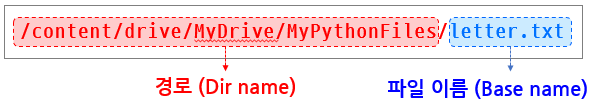
- \ (```\```) : Windows 에서 directory 와 directory, base name 구분에 사용함
- / : Linux, OS X에서 사용하는 경로 구분자
- Python에서는 \ (```\```), / 모두 사용 가능하며, \ (```\```)의 경우 ```\\```와 같이 사용함

In [ ]:
Windows : 'C:\\PythonFiles\\letter.txt'  r'C:\PythonFiles\letter.txt'
Linux : '/content/drive/MyDrive/MyPythonFiles/letter.txt'

### 1-01. dirname, basename
- dirname : path에서 basename을 제외한 경로
  - os.path.dirname(file)을 사용하여  dirname을 알아낼 수 있음
- basename : path에서 마지막 파일/디렉터리 이름
  - os.path.basename(file)을 사용하여  basename을 알아낼 수 있음
  

In [ ]:
# Linux : 파일의 대/소문자 표기에 주의 할 것
import os

file = "/content/drive/MyDrive/MyPythonFiles/letter.txt"
#file = os.getcwd()
dirname  = os.path.dirname(file)
basename = os.path.basename(file)
print(f'dirname = {dirname}')
print(f'basename = {basename}')

dirname = /content/drive/MyDrive/MyPythonFiles
basename = letter.txt


### 1-02. 절대 경로, 상대 경로
- File System에서 경로(Path)는 File, Directory 등의 위치 정보를 의미함
- Path를 표기하는 방법으로 '절대 경로'와 '상대 경로' 가 있음
  - 절대 경로 : 리눅스인 경우 '/' 부터, Windows인 경우 'C:/'와 같은 드라이브 이름부터 시작하는 경로
  - 상대 경로 : 현재 디렉터리를 기준으로 상위, 하위 디렉터리를 이동하며 표현되는 경로
    - . : 현재 디렉터리
    - .. : 상위 디렉터리
    - 이름 : 하위 디렉터리
- 현재 작업 디렉터리가 ```/content/drive/MyDrive/MyPythonFiles/TextFiles/A``` 인 경우

  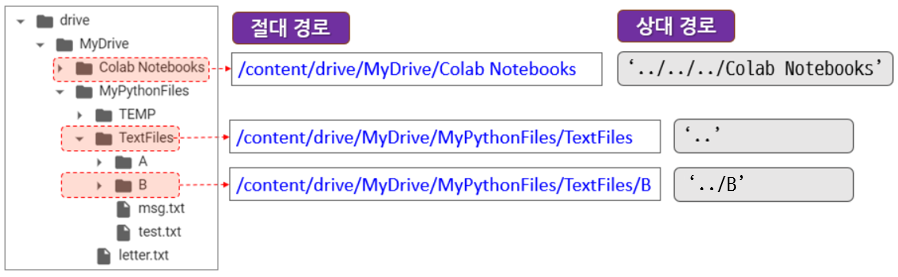

### 1-03. 디렉터리 변경/확인 및 파일 속성 관련 함수

- 현재 작업 디렉터리(Current Working Directory)
  - 사용자 프로그램은 동작 중 특정 디렉터리를 사용하게 되며, **현재 사용하는 디렉터리**를 현재 작업 디렉터리라고 함
  - os.getcwd()로 알 수 있음
- 디렉터리 변경(Change Directory) : os.chdir(path)
- 디렉터리 생성(Make Directory) : os.mkdir(path)
- 파일 속성 관련 함수
  - os.path.getsize(path) : path의 파일 크기를 바이트 단위로 반환  
  - os.path.exists(path) : path 파일이 존재하는지 확인, 존재하면 True
  - os.path.isdir(path) : path가 디렉터리인지 확인
  - os.path.isfile(path) : path가 파일인지 확인, 파일이면 True  


In [ ]:
import os

cwd = os.getcwd()
print(cwd)

In [ ]:
os.chdir('./MyPythonFiles/TextFiles/A')
print(os.getcwd())

In [ ]:
if not os.path.exists('../C') : 
    os.mkdir('../C')
os.chdir('../C')
print(os.getcwd())

In [ ]:
os.chdir('/content/drive/MyDrive/MyPythonFiles')
print(os.getcwd())
filename1 = 'letter.txt'  # 일반 파일
filename2 = 'TextFiles'   # 디렉터리
for filename in filename1, filename2 :
    print(os.path.getsize(filename))
    print(os.path.exists(filename))
    print(os.path.isdir(filename))
    print(os.path.isfile(filename))
    print('-' * 7)

### 1-04. 경로 및 파일이름 관련 함수
- os.path.abspath(path) : path에 대한 절대 경로 문자열 반환
- os.path.isabs(path) : path에 대해 절대 경로인지 확인 절대 경로일 때 True
- os.path.relpath(path[, start]) : start 경로로 시작하는 path의 상대 경로 문자열 반환, start가 제공되지 않으면 현재 작업 디렉터리가 사용됨
- filePath.split(os.path.sep) : os.path.sep에 맞추어 filePath를 분리함
  - filePath는 경로 + 파일이름이며, '문자열'로 작성함 


In [ ]:
import os

file = '/content/drive/MyDrive/MyPythonFiles/TextFiles/A'
os.chdir(file)
print(f'current working directory \n{os.getcwd()}\n')

print(os.path.isabs('.'))  # False
print(os.path.isabs(file))  # True
print(os.path.abspath('.')) # /content/drive/MyDrive/MyPythonFiles/TextFiles/A
print(os.path.abspath('../B')) # /content/drive/MyDrive/MyPythonFiles/TextFiles/B

current working directory 
/content/drive/MyDrive/MyPythonFiles/TextFiles/A

False
True
/content/drive/MyDrive/MyPythonFiles/TextFiles/A
/content/drive/MyDrive/MyPythonFiles/TextFiles/B


In [ ]:
print(f'current working directory \n{os.getcwd()}\n')
file = '/content/drive/MyDrive/MyPythonFiles/TextFiles/B'
print(os.path.relpath(file))
print(os.path.relpath('/content/drive/MyDrive/MyPythonFiles/TextFiles', '/content/drive/MyDrive/MyPythonFiles/TextFiles/A'))

current working directory 
/content/drive/MyDrive/MyPythonFiles/TextFiles/A

../B
..


In [ ]:
# windows에서의 경로
file1 = 'C:\\MyPythonFiles\\TextFiles' # os.path.sep로 분리 안됨, colab = Linux
file2 = 'C:/MyPythonFiles/TextFiles'   # 잘못된 것!!
# Linux에서의 경로
file3 = '/content/drive/MyDrive'

print(f'os.path.sep = {os.path.sep}')  # /  
for file in file1, file2, file3 :  
    print(os.path.sep, file.split(os.path.sep))
    print('-' * 50)

os.path.sep = /
/ ['C:\\MyPythonFiles\\TextFiles']
--------------------------------------------------
/ ['C:', 'MyPythonFiles', 'TextFiles']
--------------------------------------------------
/ ['', 'content', 'drive', 'MyDrive']
--------------------------------------------------


## 2.파일 입출력
- 텍스트 파일 
  - txt, py, c, h, cpp, sh 등의 확장자
  - 텍스트 편집기(메모장)로 열어 내용을 볼 수 있음
- 이진 파일
  - 워드, 엑셀, 파워포인트 문서, PDF, 이미지, 실행 파일 등
  - 이진 파일은 형식 마다 고유한 방식으로 처리 됨
  - 일반 메모장 같은 편집기로 확인할 수 없음  

### 2-01. 파일 읽기/쓰기의 3 단계
1. open() 함수를 호출하여 File 객체 얻기
  - File 객체 저장 이름 = open(path, mode)
  - mode : 읽기(r), 쓰기(w), 추가(a)
  - 'w' : 파일이 존재하면 파일의 모든 내용을 삭제하고 다시 쓰기 준비
  - 'a' : 파일이 존재하면 내용 삭제 없이, 파일의 뒤에 내용을 추가함
  - 'b' : 'r', 'w' 등과 같이 사용하며, 이진 파일에 사용함

2. File 객체의 read()/readlines(), write() 메서드로 읽기 쓰기
  - File객체.read() : 파일 전체를 하나의 문자열로 읽기
  - File객체.readlines() : 한 줄(\n)을 하나의 문자열로 읽어 리스트로 반환
  - File객체.write(str) : 문자열을 파일에 쓰기 
  - 자동줄바꿈 추가 없음 필요시 \n을 사용함
3. File 객체의 close() 메서드로 파일 닫기
  - File객체.close()

In [ ]:
file = '/content/drive/MyDrive/MyPythonFiles/letter.txt'

# file을 읽기 용으로 열어 생성된 File객체에 myfile 이라는 이름을 붙인다
myfile = open(file, 'r')
# myfile에서 전체 파일 내용을 하나의 문자열로 반환 받아 mycont 라는 이름을 붙인다.
mycont = myfile.read()

# mycont의 type과 내용을 출력하여 본다.
print(type(mycont))
print(mycont)

# myfile 객체를 close() 한다
myfile.close()

In [ ]:
# file을 읽기 용으로 열어 생성된 File객체에 myfile 이라는 이름을 붙인다
myfile = open(file)

# myfile에서 하나의 행을 하나의 문자열 item으로 하는 리스트를 반환 받아 mycont 라는 이름을 붙인다.
mycont = myfile.readlines()

# mycont의 type과 내용을 출력하여 본다.
print(type(mycont))
print(mycont)

# myfile 객체를 close() 한다
myfile.close()

<class 'list'>
['Dear friend,\n', 'How are you?\n']


In [ ]:
file = '/content/drive/MyDrive/MyPythonFiles/letter2.txt'

# file을 쓰기 용으로 열어 생성된 File객체에 myfile 이라는 이름을 붙인다
myfile = open(file, 'w')
# myfile의 write 메서드를 사용하여 'Take care! See u later~\n'를 파일에 쓰기 작업한다
myfile.write('Take care! See u later~\n')
# myfile 객체를 close() 한다
myfile.close()

In [ ]:
# letter2.txt의 내용을 읽어 화면에 표시한다.
myfile = open(file, 'r')
msg = myfile.readlines()
print(msg)
myfile.close()

In [ ]:
file = '/content/drive/MyDrive/MyPythonFiles/letter2.txt'

# file을 추가 용으로 열어 생성된 File객체에 myfile 이라는 이름을 붙인다
myfile = open(file, 'a')
# myfile의 write 메서드를 사용하여 'Nice to meet you!\n'를 파일에 쓰기 작업한다
myfile.write('Nice to meet you!\n')
# myfile 객체를 close() 한다
myfile.close()

In [ ]:
# letter2.txt의 내용을 읽어 화면에 표시한다.
myfile = open(file, 'r')
msg = myfile.readlines()
print(msg)
myfile.close()

['Take care! See u later~\n', 'Nice to meet you!\n']


### 2-02. with statement

파일과 소켓 같이 ‘리소스’에 접근하는 경우 핸들(handle) 처리가 중요하다

- 리소스를 제어를 위한 핸들을 얻고, 반환하는 작업이 필요하다
  - 핸들 반환 전에 특정 조건에 의해 예외가 발생하여 리소스 정리를 못하고 종료 될 수 있다
- with문은 파일, 소켓 같이 열고 닫는 자원 접근 시 사용 된다 
  - with문을 통해 리소스 접근을 특정 블록 내의 동작으로 제한한다
  - with문 블록이 끝날 때 리소스를 자동으로 해제 처리 하는 것을 보장한다
- with문의 용법
  - with문을 콤마를 이용해 나열해 사용하거나 중첩하여 사용할 수 있다

  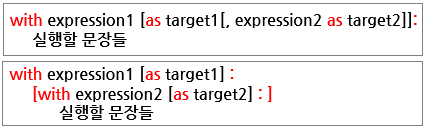

In [ ]:
file = '/content/drive/MyDrive/MyPythonFiles/letter.txt'

# with statement를 사용한 handle의 자동 반환을 구현한다
# file의 내용을 읽어 화면에 출력한다
with open(file, 'r') as fp:
    cont1 = fp.read()
    fp.seek(0)
    cont2 = fp.read()


print(cont1)
print('-' * 20)
print(cont2)
print('-' * 20)

#msg = fp.read() # ValueError: I/O operation on closed file.
#print(msg)

In [ ]:
with open(file, 'r') as fp :
    for idx, line in enumerate(fp, start=1):
        print(idx, line)
        

1 Dear friend,

2 How are you?



In [ ]:
file = 'ABC'
with open(file) as fp:  # FileNotFoundError [Errno 2] No such file or directory: 'ABC'
    msg = fp.read()
    print(msg)

FileNotFoundError: ignored

In [ ]:
#file = '/content/drive/MyDrive/MyPythonFiles/letter.txt'
file = 'None'
try:
    with open(file) as fp:
        msg = fp.read()
        print(msg)
except IOError:
    print("File doesn't exist or No read permission")

print("Done")

File doesn't exist or No read permission
Done


In [ ]:
file = 'None'
if os.access(file, os.F_OK) and os.access(file, os.R_OK) :
    with open(file) as fp:
        msg = fp.read()
        print(msg)
else:
    print("File doesn't exist or No read permission")

File doesn't exist or No read permission


### 2-03. 파일 복사 프로그램 작성

fileR을 읽어 fileW에 쓰기 작업하는 동작을 통해 파일을 복사하는 프로그램을 작성한다

- fileR이 존재하고 읽기 권한이 있는지 확인한다
  - fileR의 존재 확인은 os.access(file, os.F_OK), 읽기 권한 확인은 os.access(file, os.R_OK)를 사용한다
  - 존재하고 읽기 권한이 있는 경우 fileR의 내용을 읽어 fileW에 쓰기 동작하고, 복사 성공 메시지를 출력한다
  - 존재하지 않거나, 읽기 권한이 없다면, 오류 메시지를 출력한다

In [ ]:
import os

fileR = '/content/drive/MyDrive/MyPythonFiles/letter.txt'
fileW = '/content/drive/MyDrive/MyPythonFiles/letter_cp.txt'

if  os.access(fileR, os.F_OK) and os.access(fileR, os.R_OK) : # fileR의 존재 및 읽기 권한 확인 코드
    # fileR에서 읽어 fileW에 쓰기 코드 작성    
    with open(fileR, 'r') as rp, open(fileW, 'w') as wp :
        msg = rp.read()
        wp.write(msg)

    print(f"{fileR!r} copy success!!")
else :
    print(f"{fileR!r} doesn\'t exist or no read permission")

'/content/drive/MyDrive/MyPythonFiles/letter.txt' copy success!!


### 2-04. 행 조작 프로그램 작성

파일을 열어 다음과 같이 조작하여 저장하는 프로그램을 작성하라
- /content/drive/MyDrive/MyPythonFiles/mydata.txt 파일을 사용한다
- 파일 조작 내용은 다음과 같다
  - 1~3번째 행을 삭제한다
  - 파일의 각 행을 길이 별로 정렬한다 (길이에 행 번호는 포함하지 않음)
  - 마지막 행에 “Good luck to you!\n”를 추가한다
  - 새롭게 1번부터 시작하는 행 번호를 붙여 mydataT.txt 로 저장한다


In [ ]:
# mydata.txt
1 Time doesn't wait for anyone.
2 Idleness is an enemy to success.
3 More haste, less speed.
4 Make hay while the sun shines.
5 Every failure is a stepping stone to success.
6 A friend is a second self.
7 Life isn't always what one like.
8 It doesn't hurt to try.
9 He who laughs alst, laughs best.
10 Rather be dead then cool.
11 Learning to love yourself is the greatest love of all.


In [ ]:
# mydataT.txt
1 It doesn't hurt to try.
2 Rather be dead then cool.
3 A friend is a second self.
4 Make hay while the sun shines.
5 Life isn't always what one like.
6 He who laughs alst, laughs best.
7 Every failure is a stepping stone to success.
8 Learning to love yourself is the greatest love of all.
9 Good luck to you!


In [ ]:
import os

fileR = '/content/drive/MyDrive/MyPythonFiles/mydata.txt'
fileW = '/content/drive/MyDrive/MyPythonFiles/mydataT.txt'
# 1~3번째 행을 삭제한다
# 파일의 각 행을 길이 별로 정렬한다 (길이에 행 번호는 포함하지 않음)
# 마지막 행에 “Good luck to you!\n”를 추가한다
# 새롭게 1번부터 시작하는 행 번호를 붙여 mydataT.txt 로 저장한다

# 문자열, 문자열 list, built-in함수(enumerate, zip, map)
import pprint as pp

if os.path.exists(fileR) :
    # 여기에 코드를 작성하세요!
    with open(fileR, 'r') as fp :
        r = fp.readlines()        
        rn = r[3:]
        rn = [ x.split(maxsplit=1)[1] for x in rn]
        rn.sort(key=len)
        rn.append('Good luck to you!\n')
        rn = [ f'{idx} {x}'  for idx, x in enumerate(rn, start=1) ]
        pp.pprint(rn)
    
    with open(fileW, 'w') as fp:
        fp.write(''.join(rn))
            
    print(f"{fileR!r} transformation success!!")
else :
    print(f"{fileR!r} doesn\'t exist")



["1 It doesn't hurt to try.\n",
 '2 Rather be dead then cool.\n',
 '3 A friend is a second self.\n',
 '4 Make hay while the sun shines.\n',
 "5 Life isn't always what one like.\n",
 '6 He who laughs alst, laughs best.\n',
 '7 Every failure is a stepping stone to success.\n',
 '8 Learning to love yourself is the greatest love of all.\n',
 '9 Good luck to you!\n']
'/content/drive/MyDrive/MyPythonFiles/mydata.txt' transformation success!!


### 2-05. 열 조작 프로그램 작성

파일을 열어 다음과 같이 조작하여 저장하는 프로그램을 작성하라
- /content/drive/MyDrive/MyPythonFiles/mydata2.txt 파일을 사용한다
- 파일 조작 내용은 다음과 같다
  - 1번, 6번 열을 교환하고, 3번, 4번 열을 교환한다
  - 마지막 열을 삭제한다
  - 교환을 위한 함수와 삭제를 위한 함수를 각각 작성하여 사용한다
  - mydata2T.txt 로 저장한다


In [ ]:
# mydata2.txt

1 283 748 328 57 454 7 148 289
2 240 996 7 578 826 254 65 272
3 754 674 781 925 681 656 963 445
4 700 304 598 584 469 40 808 954
5 94 27 374 587 373 912 218 447
6 216 487 800 320 434 324 449 756
7 889 742 259 636 71 194 598 391
8 308 623 9 993 426 567 243 629
9 131 668 137 654 321 758 301 742
10 51 331 211 408 817 529 513 161


In [ ]:
# mydata2T.txt
1 7 748 57 328 454 283 148
2 254 996 578 7 826 240 65
3 656 674 925 781 681 754 963
4 40 304 584 598 469 700 808
5 912 27 587 374 373 94 218
6 324 487 320 800 434 216 449
7 194 742 636 259 71 889 598
8 567 623 993 9 426 308 243
9 758 668 654 137 321 131 301
10 529 331 408 211 817 51 513

In [ ]:
import os

fileR = '/content/drive/MyDrive/MyPythonFiles/mydata2.txt'
fileW = '/content/drive/MyDrive/MyPythonFiles/mydata2T.txt'

# 1번, 6번 열을 교환하고, 3번, 4번 열을 교환한다
# 마지막 열을 삭제한다
# 교환을 위한 함수와 삭제를 위한 함수를 각각 작성하여 사용한다
# mydata2T.txt 로 저장한다
import pprint as pp

def exchangeCols(data, c1, c2):
    for x in data :
        x[c1], x[c2] = x[c2], x[c1]

def deleteColumn(data, c):
    for x in data :
        del x[c]

if os.path.exists(fileR) :
    # 여기에 코드를 작성하세요
    with open(fileR, 'r') as fp :
        r = fp.readlines()
        rn = [ x.split() for x in r]
        exchangeCols(rn, 1, 6)
        exchangeCols(rn, 3, 4)
        deleteColumn(rn, -1)
    with open(fileW, 'w') as fp :
        rn = '\n'.join(' '.join(x) for x in rn )  
        fp.write(rn)
    print(type(rn), rn, sep='\n')

    print(f"{fileR!r} transformation success!!")
else :
    print(f"{fileR!r} doesn\'t exist")

<class 'str'>
1 7 748 57 328 454 283 148
2 254 996 578 7 826 240 65
3 656 674 925 781 681 754 963
4 40 304 584 598 469 700 808
5 912 27 587 374 373 94 218
6 324 487 320 800 434 216 449
7 194 742 636 259 71 889 598
8 567 623 993 9 426 308 243
9 758 668 654 137 321 131 301
10 529 331 408 211 817 51 513
'/content/drive/MyDrive/MyPythonFiles/mydata2.txt' transformation success!!


## 3.파일 관련 다양한 모듈

### 3-01. 파일, 디렉터리 복사
- File객체의 read(), write()를 사용하여 1개 파일 복사
- shutil 모듈의 copy() 함수를 사용하여 1개 파일 복사
   - shutil.copy(원본파일, 사본파일)
- distutils.dir_util의 copy_tree() 함수를 사용하여 1개 디렉터리 복사
   - distutils.dir_util.copy_tree(원본디렉터리, 사본디렉터리)

In [ ]:
import os

fileR = '/content/drive/MyDrive/MyPythonFiles/letter.txt'
fileW = '/content/drive/MyDrive/MyPythonFiles/letter_cp.txt'

if os.path.exists(fileR) :
    with open(fileR, 'r') as myfileR, open(fileW, 'w') as myfileW:
        mycontents = myfileR.read()
        myfileW.write(mycontents)

    print(f"{fileR!r} copy success!!")
else :
    print(f"{fileR!r} doesn\'t exist")

In [ ]:
import os,shutil

fileR = '/content/drive/MyDrive/MyPythonFiles/letter.txt'
fileW = '/content/drive/MyDrive/MyPythonFiles/letter_cp2.txt'

if os.path.exists(fileR) :
    # 파일 복사 코드 작성
    shutil.copy(fileR, fileW)
    print(f"{fileR!r} copy success!!")
else :
    print(f"{fileR!r} doesn\'t exist")


'/content/drive/MyDrive/MyPythonFiles/letter.txt' copy success!!


In [ ]:
import os
from distutils.dir_util import copy_tree
dirR = '/content/drive/MyDrive/MyPythonFiles/TextFiles'
dirW = '/content/drive/MyDrive/TextFiles' 

if os.path.exists(dirR) :
    # 디렉터리 복사 코드 작성
    copy_tree(dirR, dirW)
    print(f"{dirR!r} copy success!!")
else :
    print(f"{dirR!r} doesn\'t exist")

'/content/drive/MyDrive/MyPythonFiles/TextFiles' copy success!!


### 3-02. binary 파일 저장 - pickle 모듈
- 객체 serialization/deserialization을 수행
- Serialization : 객체의 상태를 메모리나 영구 저장 장치에 저장이 가능한 정보로 바꾸는 것
- Deserialization : binary 파일을 읽어 객체로 복원하는 작업
- open() 함수를 사용하여 pickle 파일에 쓰기 작업 할 때 'wb' 모드 사용
   - pickle.dump(객체, file_handle)
- open() 함수를 사용하여 pickle 파일에서 읽기 작업할 때 'rb' 모드 사용
   - X = pickle.load(file_handle)



In [ ]:
import os
os.chdir('/content/drive/MyDrive/MyPythonFiles')
print(os.getcwd())

/content/drive/MyDrive/MyPythonFiles


In [ ]:
import pickle

# data.pkl에 객체 D, E 쓰기 - serialization

D = {'A' : 65, 'B' : 66}
E = [1, 2, 3, 4, 5]
with open('data.pkl', 'wb') as fp:
    pickle.dump(D, fp)
    pickle.dump(E, fp)

print('write - data.pkl')

write - data.pkl


In [ ]:
# data.pkl 에서 객체 2개 읽기 - deserialization

with open('data.pkl', 'rb') as fp :
    X = pickle.load(fp)
    Y = pickle.load(fp)

print(X, Y)

{'A': 65, 'B': 66} [1, 2, 3, 4, 5]


In [ ]:
# data.pkl 에서 객체 여러개 읽기(EOFError) - deserialization
with open('data.pkl', 'rb') as fp :
    while True :
        try :
            X = pickle.load(fp)
            print(X)
        except EOFError :
            break

{'A': 65, 'B': 66}
[1, 2, 3, 4, 5]


### 3-03. binary 파일 저장 - shelve 모듈
- key 를 이용해 객체를 저장하고 불러옴
  - key 는 문자열을 사용함
- mode 부여 필요 없음
  - 읽고, 쓰기 모두 가능하게 열림
- 한 번 쓰기 한 내용은 계속 유지됨
- 같은 ‘key’로 여러 번 저장 시 최근 것으로 저장됨 (갱신)
- Windows에서는 X.bak. X.dat, X.dir 세 개의 파일이 생성되고, Linux에서는 X.db 파일이 생성됨


In [ ]:
import os
os.chdir('/content/drive/MyDrive/MyPythonFiles')
print(os.getcwd())

/content/drive/MyDrive/MyPythonFiles


In [ ]:
import shelve
fruits = ['orange', 'banana', 'apple']

with shelve.open('myshelf') as mydata :
    mydata['fruits'] = fruits  # 쓰기 작업
    X = mydata['fruits']       # 읽기 작업
    print(X)

['orange', 'banana', 'apple']


In [ ]:
import shelve
fruits = ['orange', 'apple']
myStr = 'hello!'
myValue = 100.2

with shelve.open('myshelf') as mydata:
     mydata['fruits'] = fruits   # 쓰기
     mydata['myStr']  = myStr
     mydata['myValue'] = myValue
     mydata['myValue'] = 200.54
     print(list(mydata.keys()))
     print(list(mydata.values()))
     print(mydata['myValue'])
     print(mydata['fruits'])     # 읽기
     print(mydata['myStr'])

['fruits', 'myStr', 'myValue']
[['orange', 'apple'], 'hello!', 200.54]
200.54
['orange', 'apple']
hello!


### 3-04. glob 모듈

glob 모듈은 윈도우의 dir, 리눅스의 ls 명령과 유사한 기능을 제공한다

**glob 모듈의 주요 함수**
- glob.glob(path) 
  - path에 대응되는 모든 파일 및 디렉터리 리스트 반환
  - 와일드 카드 문자(*, ?) 및 [...] 사용가능
- glob.iglob(path)
  - glob()와 같은 기능을 수행하지만 결과를 generator로 반환
  - 한 번에 결과를 리스트에 담지 않음
  - 결과가 매우 많은 경우 유용하게 사용될 수 있음

**glob 문자**
- ? : 1글자 문자를 대신함 (예) a??.txt
- ```*``` : 0글자 이상의 여러 글자 문자를 대신함 (예) a*.xlsx
- [...] : [  ] 내부에 포함된 글자 중 1개 문자 (예) a[bcd].csv


In [ ]:
import os, glob
file = '/content/drive/MyDrive/MyPythonFiles'
os.chdir(file)
print(os.getcwd())

/content/drive/MyDrive/MyPythonFiles


In [ ]:
# 현재 디렉터리에서 모든 파일의 목록 가져오기
print(glob.glob('*'))

['module.py', 'mydata2.txt', 'TextFiles', 'mydata.txt', 'source', 'TEMP', 'letter.txt', 'letter2.txt', 'data.pkl', 'mydata.db', 'myshelf.db', 'letter_cp.txt', 'mydataT.txt', 'mydata2T.txt']


In [ ]:
# 현재 디렉터리에서 모든 .txt로 끝나는 파일의 목록 가져오기
print(glob.glob('*.txt'))

['mydata2.txt', 'mydata.txt', 'letter.txt', 'letter2.txt', 'letter_cp.txt', 'mydataT.txt', 'mydata2T.txt']


In [ ]:
# 하위 디렉터리 TEMP에서 이름이 두 글자이고 .txt로 끝나는 파일의 목록 가져오기
# 단, 이름의 첫 글자는 숫자이고 두 번째는 아무거나 한 글자이다
print(glob.glob('TEMP/[0-9]?.txt'))

['TEMP/01.txt', 'TEMP/02.txt']


In [ ]:
# 하위 디렉터리 TEMP에서 이름이 한글자 이상이고 .txt로 끝나는 파일의 목록 가져오기
# 단, 이름의 첫 글자는 숫자이고 두 번째 글자부터는 아무거나 여러 글자로 0글자 이상이다.
print(glob.glob('TEMP/[0-9]*.txt'))

['TEMP/01.txt', 'TEMP/02.txt', 'TEMP/001.txt', 'TEMP/002.txt']


In [ ]:
import pprint as pp
import os, glob
a = glob.glob(os.path.abspath('./*.txt'))    # 절대경로
b = glob.glob('./*.txt') # 상대경로
pp.pprint(a)
pp.pprint(b)

['/content/drive/MyDrive/MyPythonFiles/mydata2.txt',
 '/content/drive/MyDrive/MyPythonFiles/mydata.txt',
 '/content/drive/MyDrive/MyPythonFiles/letter.txt',
 '/content/drive/MyDrive/MyPythonFiles/letter2.txt',
 '/content/drive/MyDrive/MyPythonFiles/letter_cp.txt',
 '/content/drive/MyDrive/MyPythonFiles/mydataT.txt',
 '/content/drive/MyDrive/MyPythonFiles/mydata2T.txt']
['./mydata2.txt',
 './mydata.txt',
 './letter.txt',
 './letter2.txt',
 './letter_cp.txt',
 './mydataT.txt',
 './mydata2T.txt']


In [ ]:
import pprint as pp
a = glob.iglob('*')
print(type(a), a)
print("\n".join( x for x in a ))
print('-' * 15)
for x in glob.iglob('*') :
    print(x)

### 3-05. 하위 디렉터리까지 모두 검색

In [ ]:
import os, glob

mypath = '/content/drive/MyDrive/MyPythonFiles'

dircnt = filecnt = 0
def tree(path, depth):
    global dircnt, filecnt    
    for x in glob.glob(path + '/*'):
        prefix =  '|--' if depth == 0 else '|' + '--' * depth + '|--'
        if os.path.isdir(x):
            dircnt += 1
            print(prefix + os.path.basename(x))
            tree(x, depth + 1)
        elif os.path.isfile(x):
            filecnt += 1
            print(prefix + os.path.basename(x))
        else:
            print(prefix + 'unknown : ', x)

os.chdir(mypath)
tree('./VIEW', 0)       
print('total ', dircnt, 'directories', filecnt, 'files')


### 3-06. os 모듈의 유용한 함수

os 모듈은 운영체제(OS)와 직접적으로 연결해주는 모듈이다
- import os  를 하면 사용할 수 있다
- https://docs.python.org/ko/3.7/library/os.html 참조


- os.listdir([path]) 
  - path 생략시 현재 작업 디렉터리의 파일 목록을 list로 반환
  - path 지정시 해당하는 디렉터리의 파일 목록을 list로 반환
- os.system(cmd)
   - 문자열 형식의 cmd를 os가 실행함
- os.access(path, mode)
   - path에 대해 mode 작업 가능 여부를 검사함
   - 가능할 때 True, mode는 '|'로 연결 가능
   - os.F_OK(파일 존재), os.R_OK, os.W_OK, os.X_OK (실행)
- os.makedirs(path[, mode=0o777, exist_ok=False)
   - 디렉터리를 재귀적으로 생성
   - exist_ok가 False면 존재하는 경우 다시 생성하지 않음
- os.remove(path), os.unlink(path)
   - 파일을 삭제함, 디렉터리면 OSError 발생
- os.removedirs(path)
   - 디렉터리를 재귀적으로 삭제함
   - path가 존재하지 않으면 FileNotFoundError 발생
- os.rename(src, dst)
   - src를 dst로 이름을 변경하거나 이동함
   - 파일, 디렉터리에 모두 적용 됨
   - src가 없으면 FileNotFoundError 발생
   - dst가 존재하면 OSError 발생

In [ ]:
import os
file = cwd + '/MyPythonFiles'

print(os.getcwd())
print(os.listdir(file))
os.system('mkdir MYDIR')
print(os.listdir())

/content/drive/MyDrive/MyPythonFiles
['module.py', 'mydata2.txt', 'TextFiles', 'mydata.txt', 'source', 'TEMP', 'letter.txt', 'letter2.txt', '.ipynb_checkpoints', 'data.pkl', 'mydata.db', 'myshelf.db', 'letter_cp.txt', 'mydataT.txt', 'mydata2T.txt', 'MYDIR']
['module.py', 'mydata2.txt', 'TextFiles', 'mydata.txt', 'source', 'TEMP', 'letter.txt', 'letter2.txt', '.ipynb_checkpoints', 'data.pkl', 'mydata.db', 'myshelf.db', 'letter_cp.txt', 'mydataT.txt', 'mydata2T.txt', 'MYDIR']


In [ ]:
import os
os.chdir(cwd + '/MyPythonFiles')
print('1:', os.listdir())
os.makedirs('./dirs/a/b', exist_ok=True)
print('2:', os.listdir())
print('3:', os.listdir('./dirs'), os.listdir('./dirs/a'))
if os.access('MYDIR', os.F_OK) and not os.access('MYTEMP', os.F_OK):
    os.rename('MYDIR', 'MYTEMP')
else :
    print("MYDIR doesn't exist or MYTEMP exist")

os.removedirs('./dirs/a/b')
print('4:', os.listdir())

### 3-07. sys 모듈의 유용한 속성

sys 모듈은 파이썬 인터프리터 관련 정보와 기능을 제공한다
- sys.modules : 현재 로딩되어 있는 모듈들을 사전 형태로 반환
- sys.path : 모듈을 찾을 때 참조하는 경로 리스트
- sys.copyright, sys.version : 설치된 파이썬의 저작권, 버전 정보
- sys.stdin, sys.stdout, sys.stderr : 표준 입력, 출력, 에러 스트림에 대응되는 파일 객체
   - sys.stdin = open('a.txt', 'r') : 표준 입력을 파일로 변경
- sys.prefix, sys.exec_prefix : 파이썬이 설치된 경로 정보
- sys.executable : 파이썬 인터프리터의 실행파일 경로 정보

In [ ]:
import sys, os

os.chdir('/content/drive/MyDrive/MyPythonFiles')
backup = sys.stdout
sys.stdout = open('data.dat', 'w')
print(sys.modules)
print(sys.path)
print(sys.copyright, sys.version)
print(sys.prefix, sys.executable)
sys.stdout = backup
with open('data.dat', 'r') as rp:
    data = rp.read()
print("\n" + data)

# sys.stdin = open('data.dat', 'r)
# data = input()
# print(data)

input message from 'data.dat'


